<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

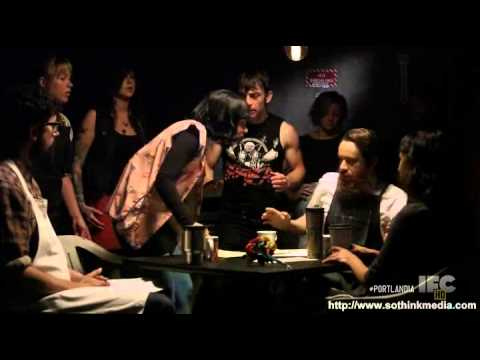

In [41]:
from IPython.display import YouTubeVideo
import spacy
from spacy.tokenizer import Tokenizer

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [37]:
import pandas as pd

url = "https://raw.githubusercontent.com/nedprz/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"
shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [38]:
shops['star_rating']=shops['star_rating'].str[1]
shops['star_rating']

0       5
1       4
2       4
3       2
4       4
       ..
7611    4
7612    5
7613    4
7614    3
7615    4
Name: star_rating, Length: 7616, dtype: object

In [39]:
shops['full_review_text']=shops['full_review_text'].str[11:]
shops['full_review_text']

0        1 check-in Love love loved the atmosphere! Ev...
1       Listed in Date Night: Austin, Ambiance in Aust...
2        1 check-in Listed in Brunch Spots I loved the...
3        Very cool decor! Good drinks Nice seating  Ho...
4       1 check-in They are located within the Northcr...
                              ...                        
7611    I actually step into this restaurant by chance...
7612    Ok, The Steeping Room IS awesome. How do they ...
7613    Loved coming here for tea, and the atmosphere ...
7614    he food is just average. The booths didn't fee...
7615    I finally stopped in for lunch with my colleag...
Name: full_review_text, Length: 7616, dtype: object

In [ ]:
STOP_WORDS=nlp.Defaults.stop_words.union(['coffee', 'coffeeshop' , 'austin' , 'texas', 'tx', 'cafe' ,''])

In [44]:
nlp = spacy.load("en_core_web_lg")

doc = nlp(shops['full_review_text'][0])

In [45]:
# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

      
1    1
check    check
-    -
in    in
Love    Love
love    love
loved    love
the    the
atmosphere    atmosphere
!    !
Every    every
corner    corner
of    of
the    the
coffee    coffee
shop    shop
had    have
its    -PRON-
own    own
style    style
,    ,
and    and
there    there
were    be
swings    swing
!    !
!    !
!    !
I    -PRON-
ordered    order
the    the
matcha    matcha
latte    latte
,    ,
and    and
it    -PRON-
was    be
muy    muy
fantastico    fantastico
!    !
Ordering    order
and    and
getting    get
my    -PRON-
drink    drink
were    be
pretty    pretty
streamlined    streamlined
.    .
I    -PRON-
ordered    order
on    on
an    an
iPad    iPad
,    ,
which    which
included    include
all    all
beverage    beverage
selections    selection
that    that
ranged    range
from    from
coffee    coffee
to    to
wine    wine
,    ,
desired    desire
level    level
of    of
sweetness    sweetness
,    ,
and    and
a    a
checkout    checkout
system    

In [54]:
import re 
def tokenize(text):

    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower()
    
    return tokens

In [71]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [56]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [58]:
shops['tokens'].head()

0      checkin love love loved the atmosphere every...
1    listed in date night austin ambiance in austin...
2      checkin listed in brunch spots i loved the e...
3     very cool decor good drinks nice seating  how...
4     checkin they are located within the northcros...
Name: tokens, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [59]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [60]:
shops['lemmas'] = shops['tokens'].apply(get_lemmas)

In [62]:
shops['lemmas'].head()

0    [  , checkin, love, love, love, atmosphere, co...
1    [list, date, night, austin, ambiance, austin, ...
2    [  , checkin, list, brunch, spot, love, eclect...
3    [ , cool, decor, good, drink, nice, seating,  ...
4    [ , checkin, locate, northcross, mall, shoppin...
Name: lemmas, dtype: object

In [64]:
shops.shape

(7616, 5)

In [72]:
wc= count(shops['lemmas'])
wc = wc[wc['rank'] <= 10]

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


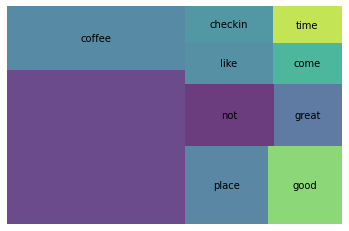

In [75]:
import squarify
import matplotlib.pyplot as plt
squarify.plot(sizes=wc['pct_total'], label=wc['word'], alpha=.8 )
plt.axis('off')
plt.show()

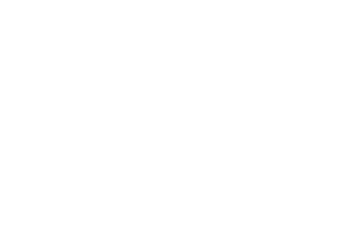

In [76]:
shops = shops.loc[shops['star_rating'] == 1.0] 

wc = count(shops['lemmas']) 
wc = wc[wc['rank'] <= 20]


squarify.plot(sizes=wc['pct_total'], label=wc['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

